# Titanic: A Beginner's Tutorial

Please feel free to ask any questions to clarify topics in the comment section. This dataset is a great guide to get your feet wet in predictive modeling and machine learning. 

## Table of Contents:
* [Cleaning the Dataframe](#Cleaning-the-Dataframe)  
    * [Age](#Age)  
    * [Cabin](#Cabin)  
    * [Embarked](#Embarked)  
* [Exploratory Analysis](#Exploratory-Analysis)
* [Feature Engineering](#Feature-Engineering)  
* [One Hot Encoding](#One-Hot-Encoding)
* [Preparing the Data](#Preparing-the-Data)
* [Tuning Hyperparameters](#Tuning-Hyperparameters)
* [Submission to CSV](#Submission-To-CSV)

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'/kaggle/input/titanic/train.csv')
test = pd.read_csv(r'/kaggle/input/titanic/test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning the Dataframe

To ensure our data is trainable in our algorithm, we must take a look at any missing values. There are a combination of techniques to fix these missing values including:
* Fill with either the median or mean. Using the median may be preferable as it is more robust to outliers. If you high extreme values on each end, then the mean may be affected severally. (i.e. mean income of the district that Bill Gates lives in.)
* Drop the column if the majority of data is missing.
* Fill with 0 if appropriate. Many times a missing value may signify "no item". This is why it is important to examine the columns with missing data closely.

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age 

In [5]:
dfs = [train ,test]

for df in dfs:
    df['Age'].fillna(df['Age'].median(), inplace = True)

In the above code we iterate through each dataframe and fill the missing Age values with the median of each dataframe! Kinda cool right. If we check, we should see that Age now has 0 missing values.

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [7]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
E101           3
              ..
C118           1
D7             1
D28            1
D10 D12        1
B4             1
Name: Cabin, Length: 147, dtype: int64

I choose to fill the missing cabin columns with 0 instead of drop it becuase cabin may be associated with passenger class! We will have a look at a correlation matrix that includes categorical columns once we have used One Hot Encoding!

In [8]:
for df in dfs:
    df['Cabin'].fillna(0, inplace = True)

The most important part of each value is what cabin letter they are in. We will aim to pull only the first character (letter) from each row.

In [9]:
cabins = []
for i in train['Cabin']:
    cabins.append(str(i))

In [10]:
letters = []
for i in cabins:
    letter= i[0]
    letters.append(letter)

In [11]:
train['Cabin'] = letters

In [12]:
cabins = []
for i in test['Cabin']:
    cabins.append(str(i))

In [13]:
letters = []
for i in cabins:
    letter = i[0]
    letters.append(letter)

In [14]:
test['Cabin'] = letters

In [15]:
train['Cabin'].head()

0    0
1    C
2    0
3    C
4    0
Name: Cabin, dtype: object

It worked! We have grabbed the first letter from each row.

### Embarked

In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We will fill with the mode of the data column. This being 'S' as it will alter out data the least. 

In [17]:
for df in dfs:
    df['Embarked'].fillna('S')

### Exploratory Analysis

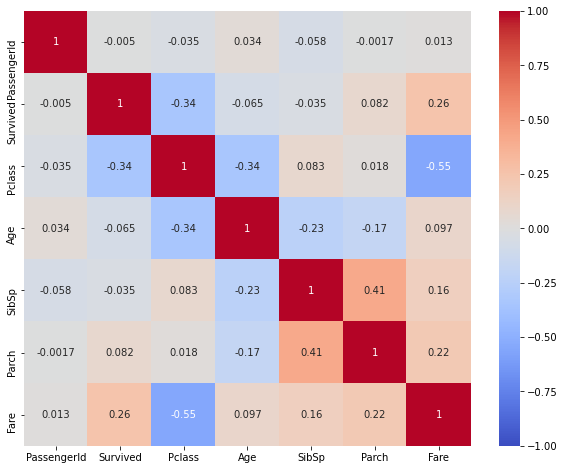

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
#seaborn & matplotlib are excellent python libraries to perform clean visualizations.
#I highly suggest you get familiar with them!

#correlation matrix 
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, fmt='.2g', vmin = -1,
            vmax = 1, center = 0, cmap = 'coolwarm')

In [19]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

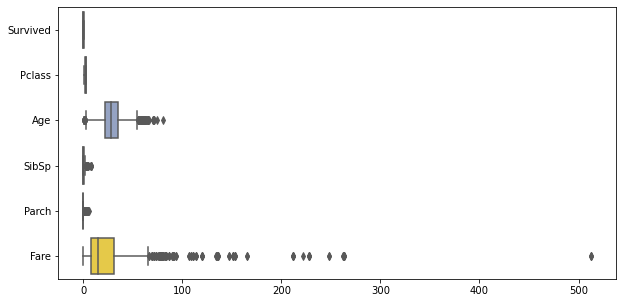

In [20]:
#boxplot
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data = train[numeric_cols], orient = 'h', palette = 'Set2')

It's a good thing that we filled fare with the median value as there is an outlier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1ede00250>,
      dtype=object)

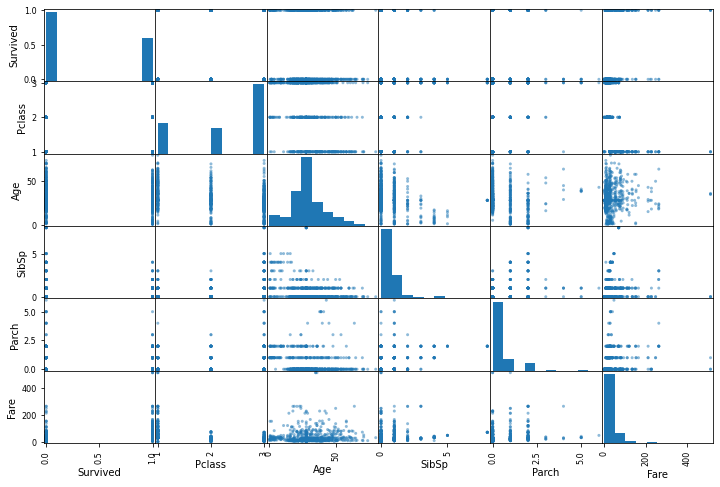

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[numeric_cols], figsize= (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1ed106150>,
      dtype=object)

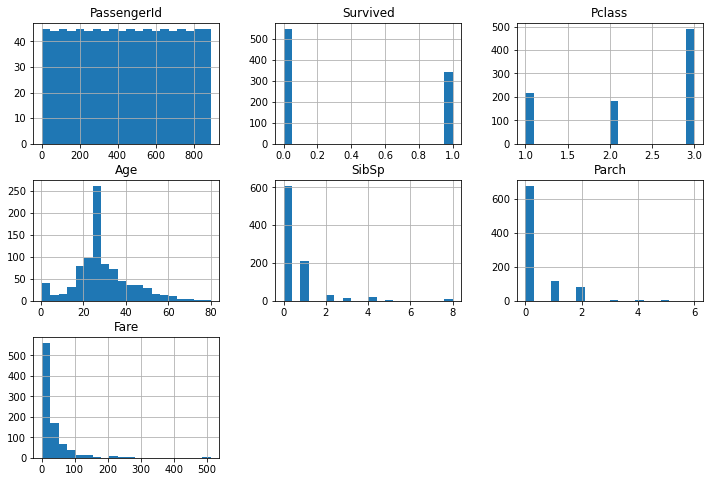

In [22]:
train.hist(bins = 20, figsize = (12,8))

Text(0.5, 1.0, 'Count Survived for each Class')

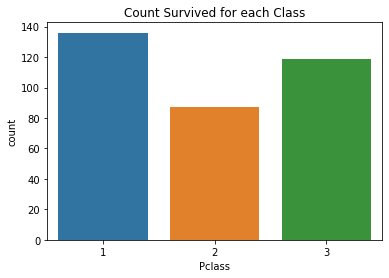

In [23]:
sns.countplot(train[train['Survived'] == 1]['Pclass']).set_title('Count Survived for each Class')

In [24]:
len(train[train['Pclass'] == 1]), len(train[train['Pclass'] == 2]), len(train[train['Pclass'] == 3])

(216, 184, 491)

In [25]:
train[train['Pclass'] == 1]['Survived'].sum(), train[train['Pclass'] == 2]['Survived'].sum(), train[train['Pclass'] == 3]['Survived'].sum()   

(136, 87, 119)

In [26]:
percentages = []
first = 136 / 216
second = 87/ 184
third = 119/491
percentages.append(first)
percentages.append(second)
percentages.append(third)

In [27]:
percents = pd.DataFrame(percentages)
percents.index+=1

Text(0.5, 1.0, 'Percent Survived for Passenger Class')

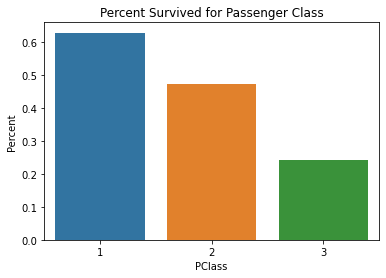

In [28]:
percents['PClass'] = ['1', '2', '3']
cols= ['Percent', 'PClass']
percents.columns = [i for i in cols]
sns.barplot(y = 'Percent', x = 'PClass', data = percents).set_title('Percent Survived for Passenger Class')

The majority of first class passengers survived with about slighly lower than 50% of 2nd class passengers surviving. The majority of third class passengers did not survive. Therefore, we can see that Passenger Class impacted your survival chance aboard the Titanic. 

### Feature Engineering

In [29]:
train['Family'] = train.apply(lambda x: x['SibSp'] + x['Parch'], axis = 1)
test['Family'] = test.apply(lambda x: x['SibSp'] + x['Parch'], axis = 1)

In [30]:
#dropping columns from the dataframe 
train.drop(['SibSp', 'Parch', 'Name', 'Ticket'], axis = 1, inplace = True)
test.drop(['SibSp', 'Parch', 'Name', 'Ticket'], axis = 1, inplace = True)

Keep in mind that the model accuracy could be improved by finding titles for each of the passengers. For simplicity of this tutorial, we won't be covering that but if enough people request it I will make the change in following versions. 

In [31]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,male,22.0,7.2500,0,S,1
1,2,1,1,female,38.0,71.2833,C,C,1
2,3,1,3,female,26.0,7.9250,0,S,0
3,4,1,1,female,35.0,53.1000,C,S,1
4,5,0,3,male,35.0,8.0500,0,S,0


### Check Test DataFrame For Any Missing Values Too!

In [32]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Cabin          0
Embarked       0
Family         0
dtype: int64

In [33]:
test['Fare'].fillna(test['Fare'].median(), inplace = True)

Now all of our missing data is filled in so we can go ahead with our model!

### One Hot Encoding

One Hot Encoding, one of the most useful techniques that a data scientist can know. This techniques label encodes categorical columns resulting in a 1 if the value is true, with all associated values in that row taking value 0. Take for example our 'Embarked' column. Using one hot encoding will create embarked_S, embarked_C, and embarked_Q columns for each row. The True value will take a 1. This is crucial to preparing data for our model as it won't take kindly to non-numerics.

In [34]:
train_df = pd.get_dummies(train)
test_df = pd.get_dummies(test)

In [35]:
#axis 1 refers to columns!
train_df.drop('PassengerId', axis = 1, inplace = True)

We can see above how one hot encoding alters the dataframe.

## Prepare Data

In [36]:
y = train_df['Survived']
train_df.drop('Survived', axis = 1, inplace = True)
train_df.drop('Cabin_T', axis = 1, inplace = True)
test_df.drop('PassengerId', axis = 1, inplace = True)

In [37]:
X_test = test_df
X_train = train_df

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
rfc = RandomForestClassifier()

### Tuning Hyperparameters 

GridSearchCV and RandomizedSearchCV are excellent tools for determing the best hyperparameters for your models! This can increase your model accuracy significantly. The only downside is it takes quite some time to run so if using very large datasets you will want to convert to numpy arrays for much faster training time. The dataset in this competition is fairly small so we won't both with this.

In [40]:
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto'],
    'max_depth': [6, 7, 8],
    'criterion': ['entropy']
}

Our param grid is set up as a dictionary so that GridSearch can take in and read the parameters. This search will perform 3 X 1 X 3 X 1 = 9 different combinations and then fit them 5 times (cv = 5), resulting in 45 models trained. Calling best_estimator_ or best_params_ will give us the model that peformed the best.

In [41]:
CV = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
CV.fit(X_train, y)
CV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)

In [42]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 8, n_estimators = 500, random_state = 42)

In [43]:
rfc.fit(X_train, y)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

In [44]:
y_pred = rfc.predict(X_test)

In [45]:
#we can reshape this array using .reshape(-1, 1)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Submission To CSV

In [46]:
#reshape array so that it can be used in a dataframe for easy submission!
submission = y_pred.reshape(-1, 1)

Take a look at your submission object now by calling (submission). It should print out the array reshaped. I won't include it here because it will make the reader scroll quite a bit to pass the section.

In [47]:
sub_df = pd.DataFrame(submission)

In [48]:
sub_df['PassengerId'] = test['PassengerId']
sub_df['Survived'] = submission
cols = ['PassengerId',
       'Survived']
sub_df.drop(0, axis = 1, inplace = True)
sub_df.columns = [i for i in cols]
sub_df = sub_df.set_index('PassengerId')

In [49]:
sub_df.head(10)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
897,0
898,0
899,0
900,1


In [50]:
#put file path in string!
sub_df.to_csv(r'submission.csv')

We have just achieved top 10% Thanks for following along. Make sure to give this notebook an upvote if it was helpful!